Import Libraries & Load Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"
df = pd.read_csv(url)
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


High Level Data Understanding

In [2]:
df.shape

(57394, 49)

In [3]:
df.dtypes

,0
iso_code,object
continent,object
location,object
date,object
total_cases,float64
new_cases,float64
new_cases_smoothed,float64
total_deaths,float64
new_deaths,float64
new_deaths_smoothed,float64


In [4]:
df.info
df.describe

<bound method NDFrame.describe of       iso_code continent       location      date  total_cases  new_cases  \
0          AFG      Asia    Afghanistan  31/12/19          NaN        0.0   
1          AFG      Asia    Afghanistan  01/01/20          NaN        0.0   
2          AFG      Asia    Afghanistan  02/01/20          NaN        0.0   
3          AFG      Asia    Afghanistan  03/01/20          NaN        0.0   
4          AFG      Asia    Afghanistan  04/01/20          NaN        0.0   
...        ...       ...            ...       ...          ...        ...   
57389      NaN       NaN  International  13/11/20        696.0        NaN   
57390      NaN       NaN  International  14/11/20        696.0        NaN   
57391      NaN       NaN  International  15/11/20        696.0        NaN   
57392      NaN       NaN  International  16/11/20        696.0        NaN   
57393      NaN       NaN  International  17/11/20        696.0        NaN   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                     NaN           NaN         0.0                  NaN  ...   
1                     NaN           NaN         0.0                  NaN  ...   
2                     NaN           NaN         0.0                  NaN  ...   
3                     NaN           NaN         0.0                  NaN  ...   
4                     NaN           NaN         0.0                  NaN  ...   
...                   ...           ...         ...                  ...  ...   
57389                 NaN           7.0         NaN                  NaN  ...   
57390                 NaN           7.0         NaN                  NaN  ...   
57391                 NaN           7.0         NaN                  NaN  ...   
57392                 NaN           7.0         NaN                  NaN  ...   
57393                 NaN           7.0         NaN                  NaN  ...   

       gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0            1803.987              NaN                597.029   
1            1803.987              NaN                597.029   
2            1803.987              NaN                597.029   
3            1803.987              NaN                597.029   
4            1803.987              NaN                597.029   
...               ...              ...                    ...   
57389             NaN              NaN                    NaN   
57390             NaN              NaN                    NaN   
57391             NaN              NaN                    NaN   
57392             NaN              NaN                    NaN   
57393             NaN              NaN                    NaN   

       diabetes_prevalence  female_smokers  male_smokers  \
0                     9.59             NaN           NaN   
1                     9.59             NaN           NaN   
2                     9.59             NaN           NaN   
3                     9.59             NaN           NaN   
4                     9.59             NaN           NaN   
...                    ...             ...           ...   
57389                  NaN             NaN           NaN   
57390                  NaN             NaN           NaN   
57391                  NaN             NaN           NaN   
57392                  NaN             NaN           NaN   
57393                  NaN             NaN           NaN   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0                      37.746                         0.5            64.83   
1                      37.746                         0.5            64.83   
2                      37.746                         0.5            64.83   
3                      37.746                         0.5            64.83   
4                      37.746                         0.5            64.83   
...                       ...                         ...              ...   
57389               

Low Level Analysis

In [6]:
df['location'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faeroe Islands', 'Falkland Isla

In [7]:
df['continent'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Asia
1        Asia
2        Asia
3        Asia
4        Asia
         ... 
57389     NaN
57390     NaN
57391     NaN
57392     NaN
57393     NaN
Name: continent, Length: 57394, dtype: object>

In [8]:
df['total_cases'].max()

55154651.0

In [9]:
df['total_cases'].mean()

np.float64(167797.3688753302)

In [10]:
df['total_deaths'].quantile([0.25,0.5,0.75])

,total_deaths
0.25,13.0
0.50,84.0
0.75,727.0


In [11]:
df.groupby('continent')['human_development_index'].max()

,human_development_index
continent,
Africa,0.797
Asia,0.933
Europe,0.953
North America,0.926
Oceania,0.939
South America,0.843


In [12]:
df.groupby('continent')['gdp_per_capita'].min()

,gdp_per_capita
continent,
Africa,661.240
Asia,1479.147
Europe,5189.972
North America,1653.173
Oceania,2205.923
South America,6885.829


Filter Required Columns

In [13]:
cols = ['continent','location','date','total_cases','total_deaths',
        'gdp_per_capita','human_development_index']
df = df[cols]
df.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498


Data Cleaning

In [15]:
df = df.drop_duplicates()

In [16]:
df.isnull().sum()

,0
continent,646
location,0
date,0
total_cases,3636
total_deaths,13026
gdp_per_capita,7027
human_development_index,8147


In [17]:
df = df.dropna(subset=['continent'])

In [18]:
df = df.fillna(0)


Date Handling

In [20]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

Data Aggregation

In [55]:
df_groupby = df.groupby('continent').max().reset_index()
df_groupby


,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


Feature Engineering

In [22]:
df_groupby['total_deaths_to_total_cases'] = (
    df_groupby['total_deaths'] / df_groupby['total_cases']
)
df_groupby


,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month,total_deaths_to_total_cases
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12,0.027004
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12,0.014708
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12,0.026188
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12,0.022062
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12,0.032685
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12,0.028251


Histogram

/tmp/ipython-input-3851252495.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["gdp_per_capita"], color='darkred')


<Axes: xlabel='gdp_per_capita', ylabel='Density'>

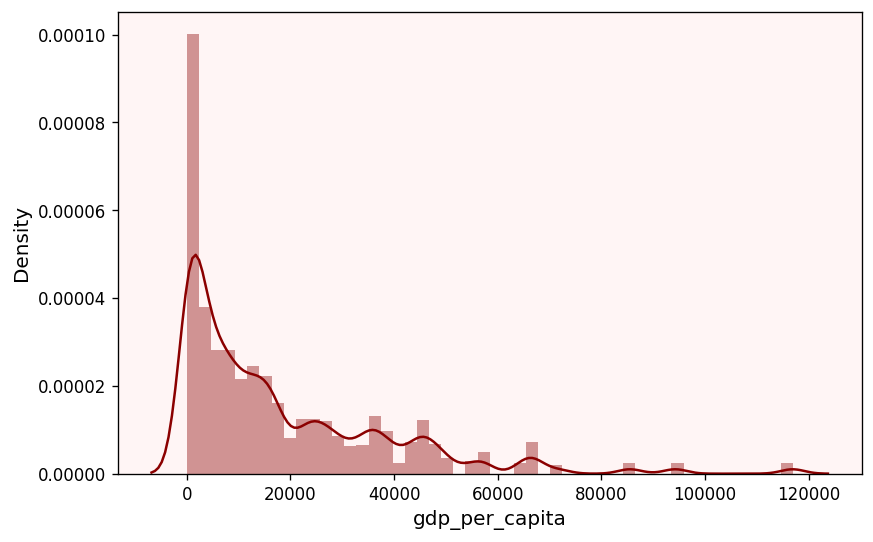

In [44]:
plt.figure(figsize=(8,5))
sns.distplot(df["gdp_per_capita"], color='darkred')

Scatter Plot

<Figure size 960x600 with 0 Axes>

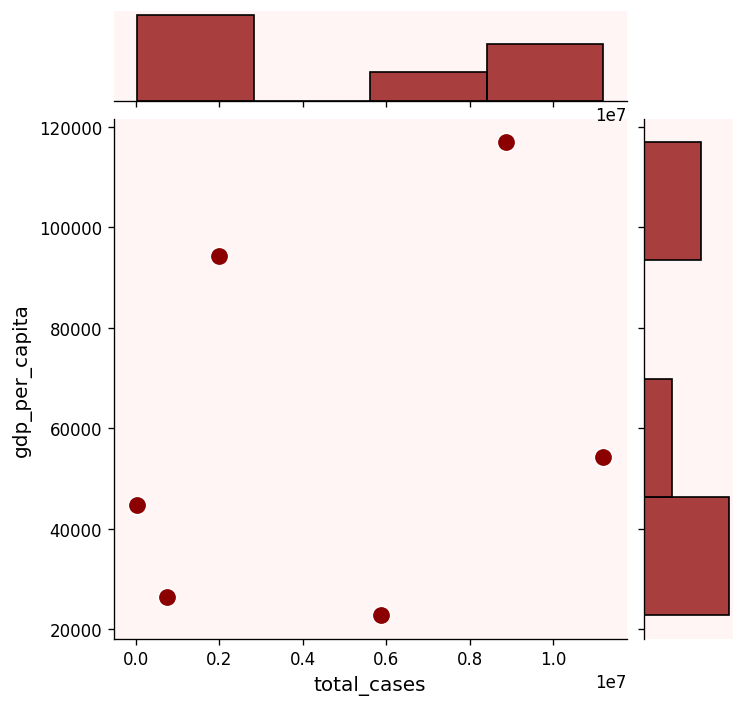

In [42]:
plt.figure(figsize=(8,5))
sns.jointplot(data=df_groupby, x='total_cases', y='gdp_per_capita', color='darkred', s=120)



Pairplot

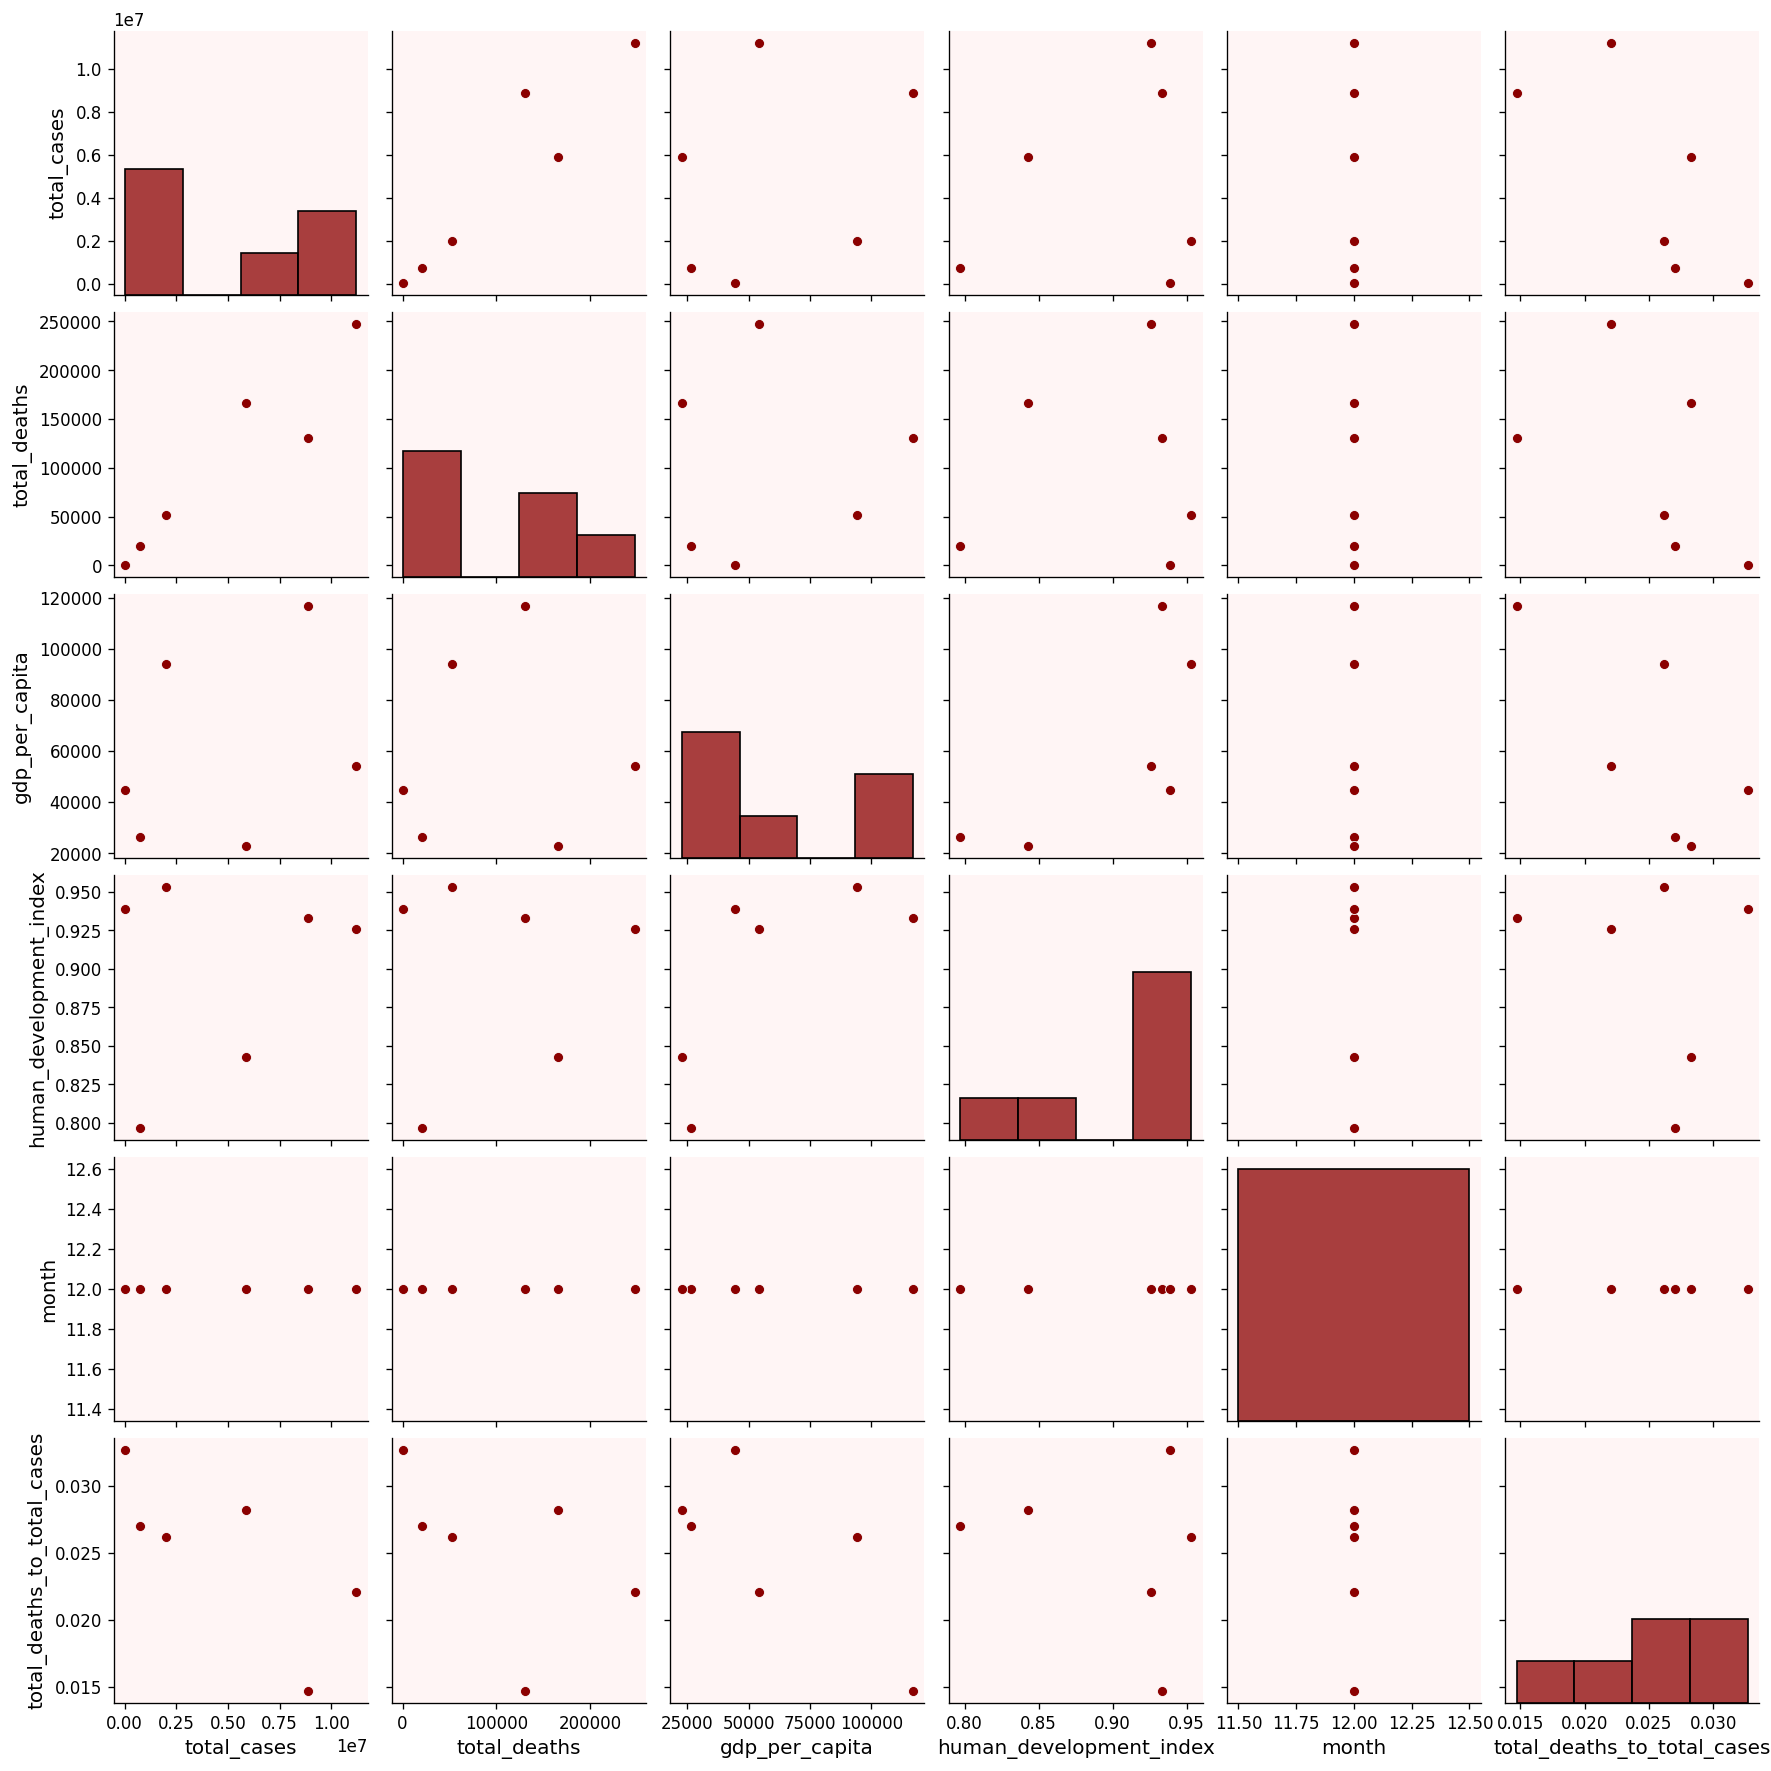

In [46]:
sns.pairplot(data=df_groupby, plot_kws={'color': 'darkred'}, diag_kws={'color': 'darkred'})

Bar Plot

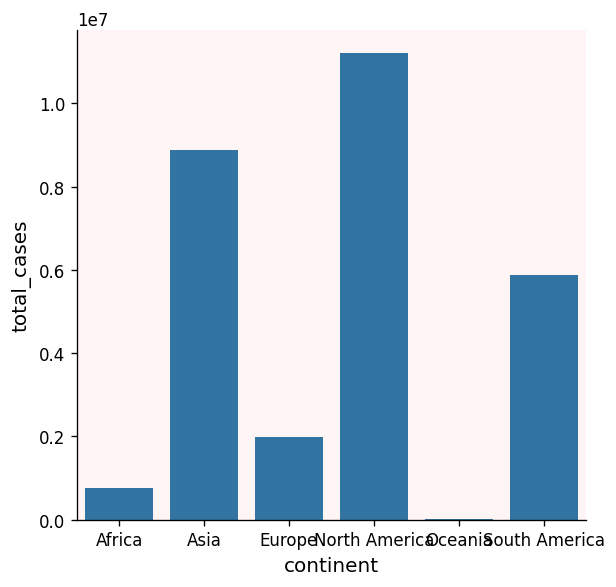

In [53]:
sns.catplot(data=df_groupby,x="continent",y="total_cases",kind="bar")